In [1]:
from sklearn.pipeline import Pipeline
from steps.feature import ImpactClassifier, ImpactWeigher
from steps.filter import ChampionReleaseFilter
from steps.reader import ReleaseReader, PlayHistoryReader, PatchHistoryReader
from steps.transform import HistoryCombiner, ImpactAggregator, ImpactDiscretizer
import joblib

cr_dict = ReleaseReader.from_csv('data/champions.csv', as_dict=True)
skins_df = ReleaseReader.from_csv('data/skins.csv')
play_df = PlayHistoryReader.from_jsonl('data/playhistory.jsonl')
impact = joblib.load('model/impact_classifier.pickle')

transf = Pipeline([
    ('filter', ChampionReleaseFilter(cr_dict)),
    ('impact_clf', ImpactClassifier(impact)),
    ('impact_w', ImpactWeigher()),
    ('impact_agg', ImpactAggregator()),
    ('combiner', HistoryCombiner(play_df, skins_df)),
    ('impact_dsc', ImpactDiscretizer())
])

raw_df = PatchHistoryReader.from_jsonl('data/patches.jsonl')
df = transf.transform(raw_df)
df

/usr/local/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,date,champion,diff,buff,nerf,popularity,winrate,banrate,skin,total_skins
0,2014-03-18,Aatrox,none,0.0,0.0,0.041186,0.5147,0.008651,0.0,1.0
1,2014-04-03,Aatrox,none,0.0,0.0,0.044511,0.5064,0.002803,0.0,1.0
2,2014-04-21,Aatrox,none,0.0,0.0,0.041942,0.5036,0.004218,0.0,1.0
3,2014-05-08,Aatrox,none,0.0,0.0,0.035388,0.4981,0.005171,0.0,1.0
4,2014-05-22,Aatrox,none,0.0,0.0,0.026381,0.4941,0.006110,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
25097,2022-01-05,Zyra,none,0.0,0.0,0.040819,0.5108,0.019420,0.0,8.0
25098,2022-01-20,Zyra,none,0.0,0.0,0.031985,0.4984,0.010657,0.0,8.0
25099,2022-02-02,Zyra,none,0.0,0.0,0.033227,0.5162,0.011589,0.0,8.0
25100,2022-02-16,Zyra,none,0.0,0.0,0.034053,0.5159,0.011444,0.0,8.0


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

ys = ['popularity', 'winrate', 'banrate']
axvcolor = {'buff': 'green', 'nerf': 'red', 'adjust': 'blue'}

def history_with_diff(df: pd.DataFrame, champion):
    df_ = df[df['champion'] == champion]
    for y in ys:
        fig, ax = plt.subplots(figsize=(15,5))
        sn.lineplot(data=df_, x='date', y=y, ax=ax)
        for _, row in df_.iterrows():
            date, diff = row['date'], row['diff']
            if diff == 'none':
                continue
            plt.axvline(x=date, color=axvcolor[diff])
        plt.title(f'{champion} {y}')
        plt.show()


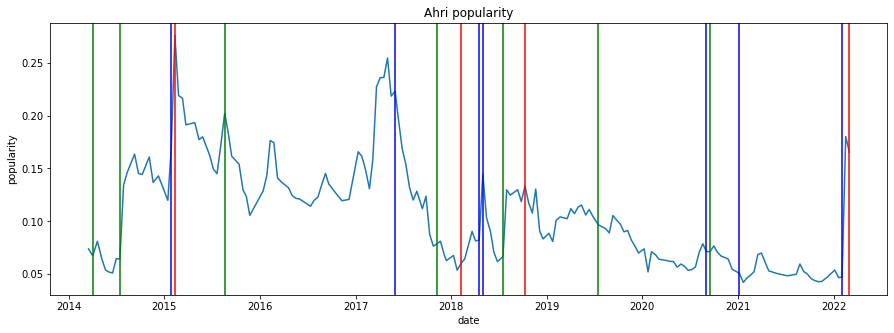

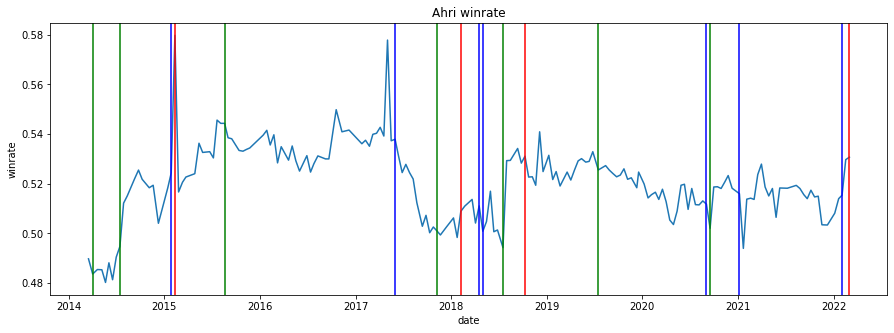

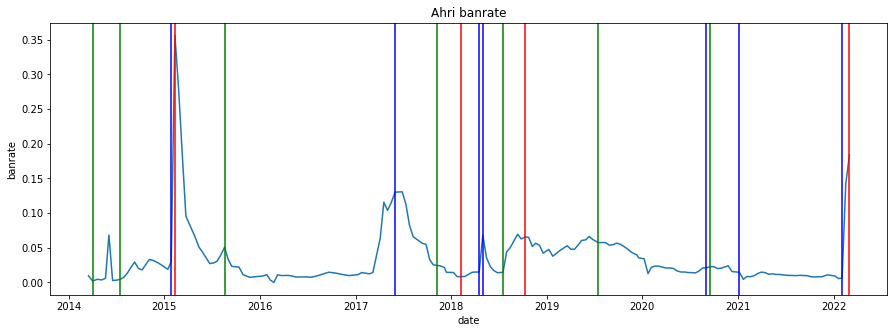

In [3]:
history_with_diff(df, "Ahri")

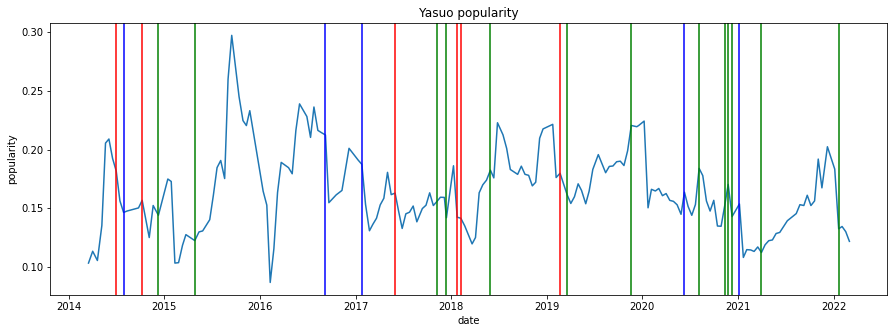

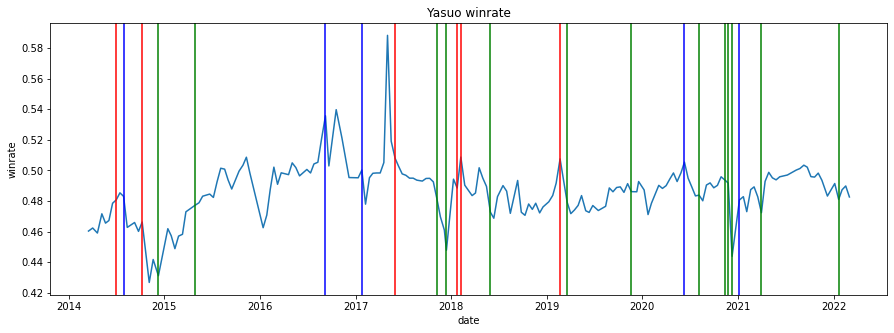

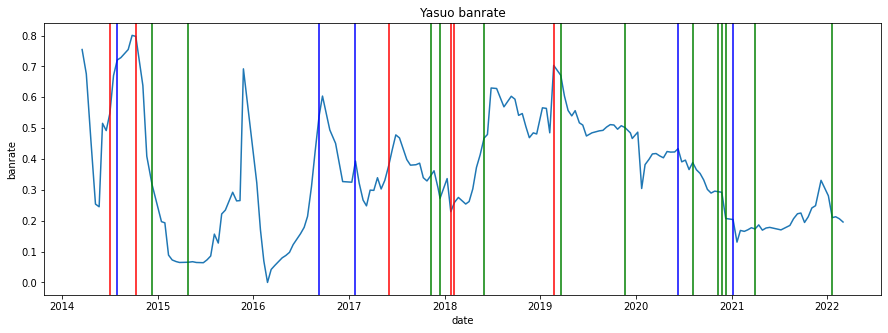

In [4]:
history_with_diff(df, "Yasuo")

In [5]:
from steps.feature import LastDiffFeatures

df_ = LastDiffFeatures().transform(df)
df_[20:50]

,date,champion,diff,buff,nerf,popularity,winrate,banrate,skin,total_skins,popularity_delta,winrate_delta,banrate_delta,date_delta
20,2015-02-25,Aatrox,none,0.00,0.0,0.012814,0.48050,0.001544,0.0,2.0,-0.028372,-0.03420,-0.007108,49.0
21,2015-03-12,Aatrox,none,0.00,0.0,0.011805,0.49450,0.001869,0.0,2.0,-0.029381,-0.02020,-0.006782,51.0
22,2015-03-25,Aatrox,buff,1.00,0.0,0.011771,0.50430,0.001701,0.0,2.0,-0.029414,-0.01040,-0.006950,53.0
23,2015-04-28,Aatrox,none,0.00,0.0,0.012515,0.48705,0.001998,0.0,2.0,0.000744,-0.01725,0.000297,4.0
24,2015-05-14,Aatrox,none,0.00,0.0,0.012657,0.50590,0.001804,0.0,2.0,0.000886,0.00160,0.000103,7.0
25,2015-05-28,Aatrox,none,0.00,0.0,0.013052,0.50580,0.002009,0.0,2.0,0.001281,0.00150,0.000308,9.0
26,2015-06-10,Aatrox,buff,3.75,0.0,0.015011,0.51105,0.001942,0.0,2.0,0.003240,0.00675,0.000241,11.0
27,2015-06-24,Aatrox,none,0.00,0.0,0.016971,0.51630,0.001874,0.0,2.0,0.001959,0.00525,-0.000068,2.0
28,2015-07-08,Aatrox,none,0.00,0.0,0.015046,0.50910,0.001980,0.0,2.0,0.000035,-0.00195,0.000038,4.0
29,2015-07-22,Aatrox,none,0.00,0.0,0.023790,0.52700,0.002697,0.0,2.0,0.008779,0.01595,0.000755,6.0


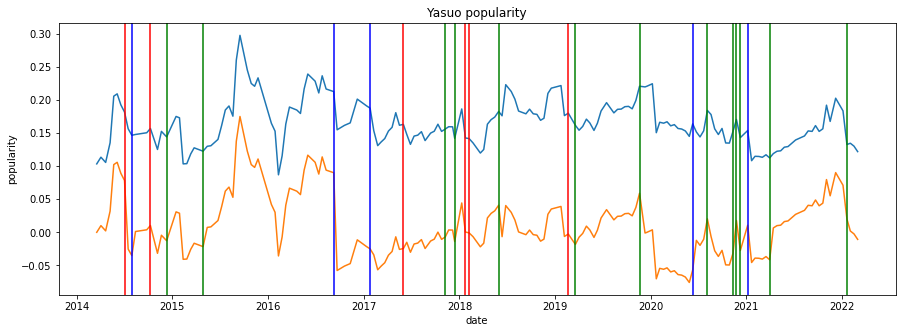

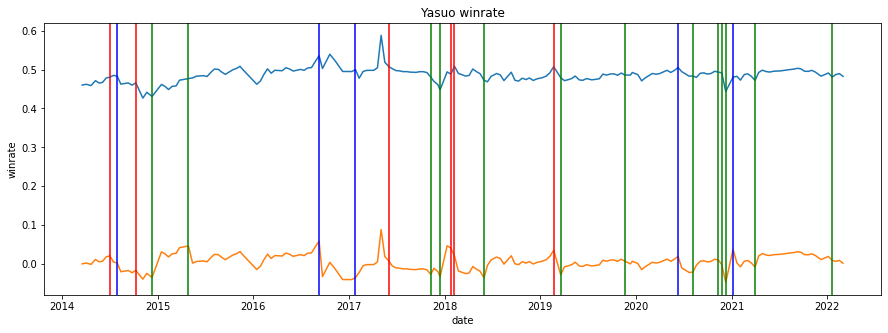

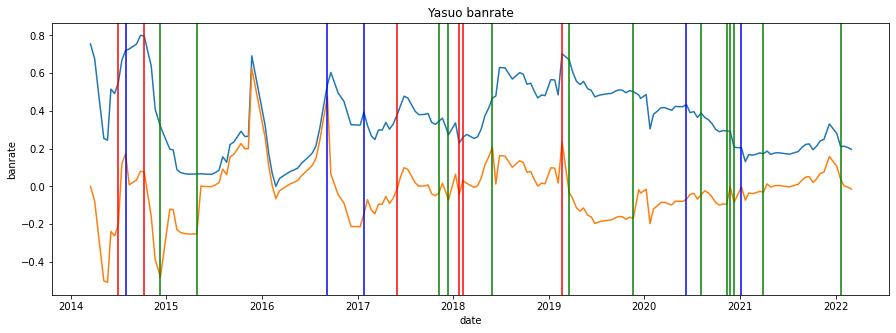

In [6]:
ys = ['popularity', 'winrate', 'banrate']
axvcolor = {'buff': 'green', 'nerf': 'red', 'adjust': 'blue'}

def history_with_delta(df: pd.DataFrame, champion):
    df_ = df[df['champion'] == champion]
    for y in ys:
        fig, ax = plt.subplots(figsize=(15,5))
        sn.lineplot(data=df_, x='date', y=y, ax=ax)
        sn.lineplot(data=df_, x='date', y=y+'_delta', ax=ax)
        for _, row in df_.iterrows():
            date, diff = row['date'], row['diff']
            if diff == 'none':
                continue
            plt.axvline(x=date, color=axvcolor[diff])
        plt.title(f'{champion} {y}')
        plt.show()

history_with_delta(df_, 'Yasuo')

=== Selection ===
              precision    recall  f1-score   support

       False       0.87      1.00      0.93      4338
        True       0.67      0.05      0.09       683

    accuracy                           0.87      5021
   macro avg       0.77      0.52      0.51      5021
weighted avg       0.84      0.87      0.81      5021



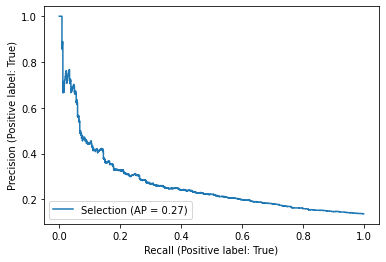

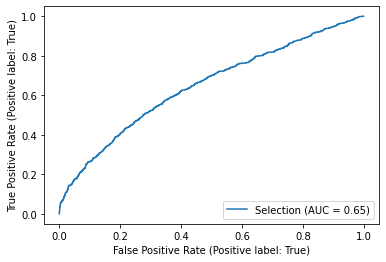

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report, plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from steps.classifier import PatchClassifier
import numpy as np

X, y = df_[['popularity', 'winrate', 'banrate', 'skin',
    'popularity_delta', 'winrate_delta', 'banrate_delta', 'date_delta',
    'diff']], df_['diff']
a_model = GradientBoostingClassifier()
c_model = RandomForestClassifier()

def eval(model, X, y, label):
    print(f'=== {label} ===')
    # score = cross_val_score(model, X, y, cv=5, scoring='recall')
    # print(f"Cross val score: {score.mean():.2f} (+/- {score.std() * 2:.2f})")
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
    model.fit(train_x, train_y)
    predicted = model.predict(test_x)
    print(classification_report(test_y, predicted))

    plot_precision_recall_curve(model, test_x, test_y, name=label)
    plot_roc_curve(model, test_x, test_y, name=label)


eval(a_model, X.drop('diff', axis=1), y != 'none', 'Selection')
# sel = a_model.predict(X.drop('diff', axis=1))
# eval(c_model, X[sel].drop('diff', axis=1), y[sel], 'Classification')



=== Selection ===
              precision    recall  f1-score   support

       False       0.87      0.99      0.93      4338
        True       0.37      0.03      0.05       683

    accuracy                           0.86      5021
   macro avg       0.62      0.51      0.49      5021
weighted avg       0.80      0.86      0.81      5021



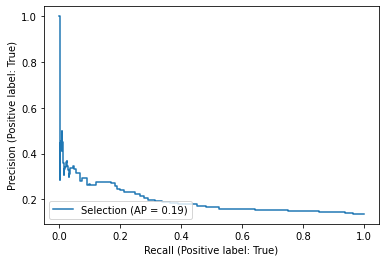

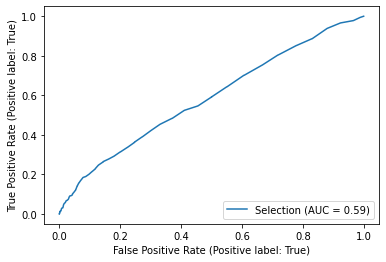

In [ ]:
eval(RandomForestClassifier(), X.drop('diff', axis=1), y != 'none', 'Selection')